In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/diabetes_prediction_dataset.csv")

In [ ]:
print(f"Number of rows : {data.shape[0]} \nNumber of columns : {data.shape[1]}")

Number of rows : 100000 
Number of columns : 9


In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
data.duplicated().sum()

3854

In [ ]:
data.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
47525,Female,73.0,0,0,current,27.32,4.8,80,0
86603,Male,80.0,0,0,No Info,34.85,6.0,145,0
27035,Male,68.0,0,0,current,27.32,6.2,160,0
89115,Female,37.0,0,0,never,38.96,6.6,85,0
83361,Male,61.0,0,0,former,27.32,4.5,140,0


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
data.describe(include='object')

,gender,smoking_history
count,96128,96128
unique,2,6
top,Female,never
freq,56161,34395


In [ ]:
print(data.shape)
data.drop(data[data["gender"]=="Other"].index , inplace=True )
print(data.shape)

(96146, 9)
(96128, 9)


In [ ]:
print(data['gender'].unique())
print(data['smoking_history'].unique())

['Female' 'Male']
['never' 'No Info' 'current' 'former' 'ever' 'not current']


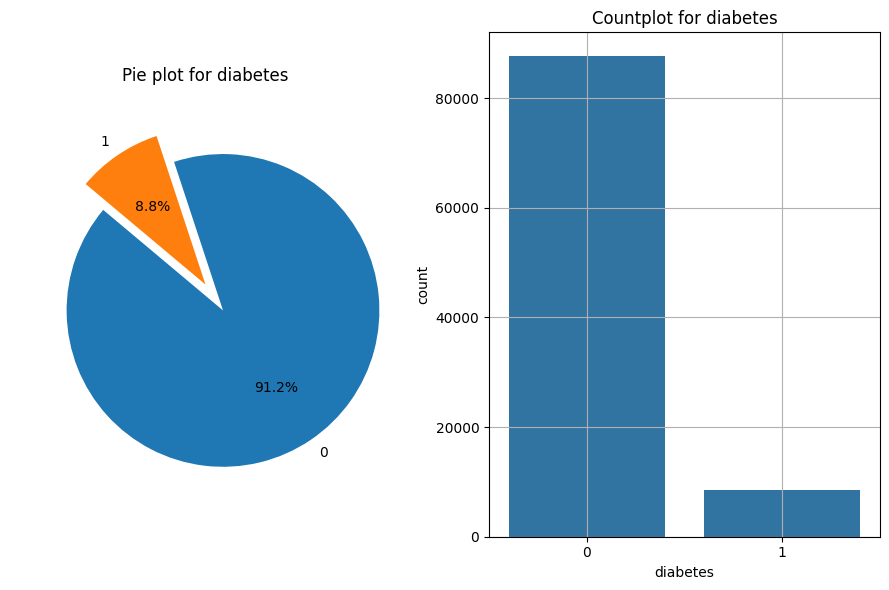

In [ ]:
sizes = data['diabetes'].value_counts()


plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title("Pie plot for diabetes")
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=140, explode=(0.2, 0))


plt.subplot(1, 2, 2)
plt.title("Countplot for diabetes")
sns.countplot(x='diabetes', data=data)


plt.grid()
plt.tight_layout()
plt.show()


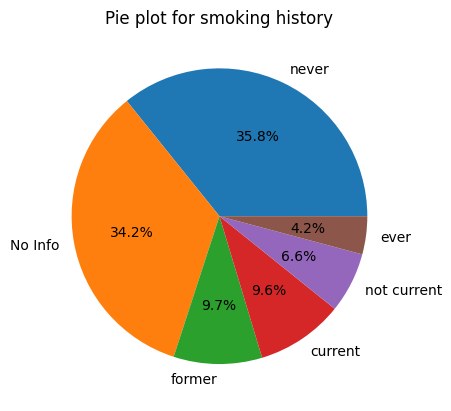

In [ ]:
sizes = data['smoking_history'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title("Pie plot for smoking history")
plt.show()


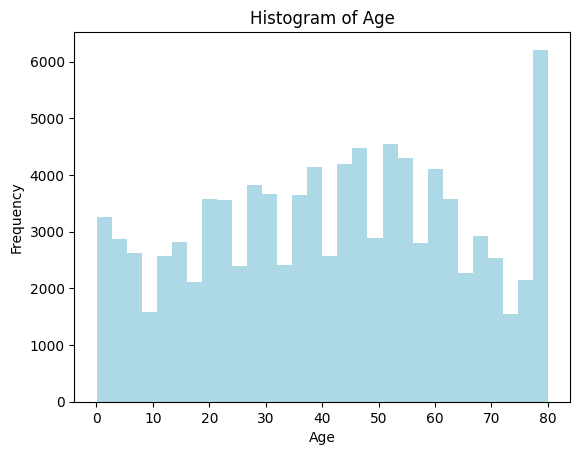

In [ ]:
plt.hist(data['age'], bins=30, color='lightblue')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


<ipython-input-24-499e8ff77de8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender',data=data ,  palette='coolwarm')


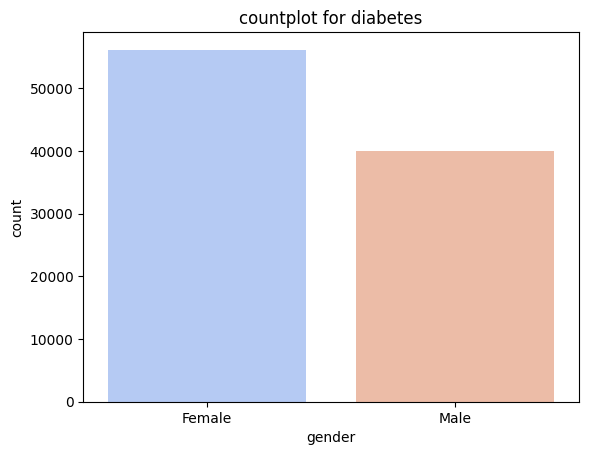

In [ ]:
sns.countplot(x='gender',data=data ,  palette='coolwarm')
plt.title("countplot for diabetes")
plt.show()

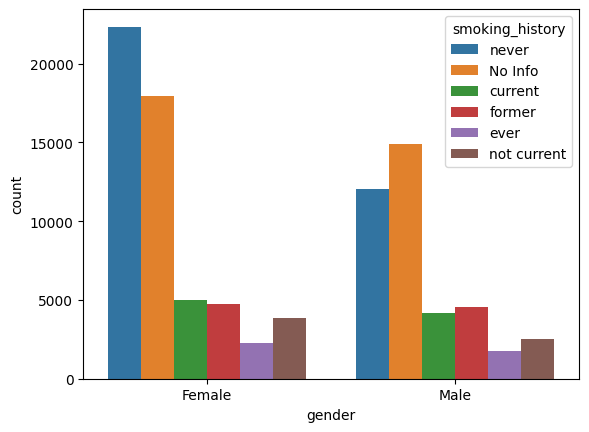

In [ ]:
sns.countplot(x='gender',data=data, hue='smoking_history')
plt.show()

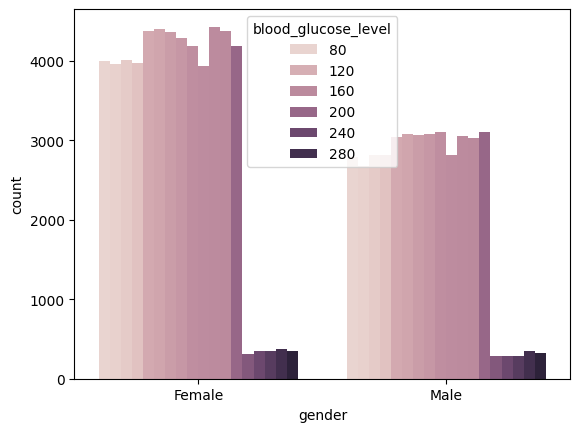

In [ ]:
sns.countplot(x='gender',data=data, hue='blood_glucose_level')
plt.show()

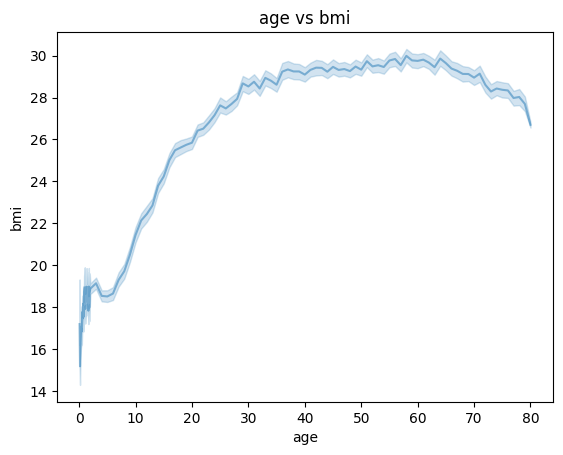

In [ ]:
sns.lineplot(x='age', y='bmi', data=data, alpha=0.5)
plt.title('age vs bmi')
plt.show()

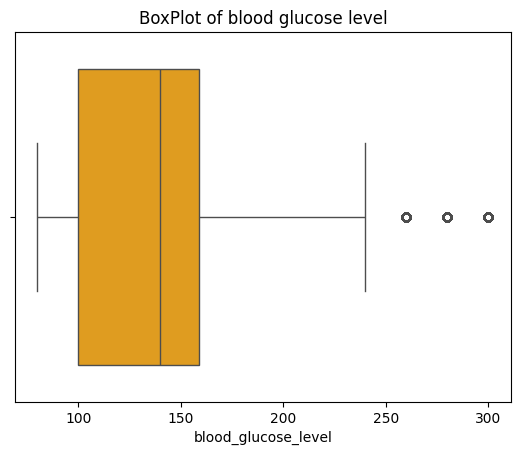

In [ ]:
sns.boxplot(x=data['blood_glucose_level'], color='orange')
plt.title("BoxPlot of blood glucose level")
plt.show()

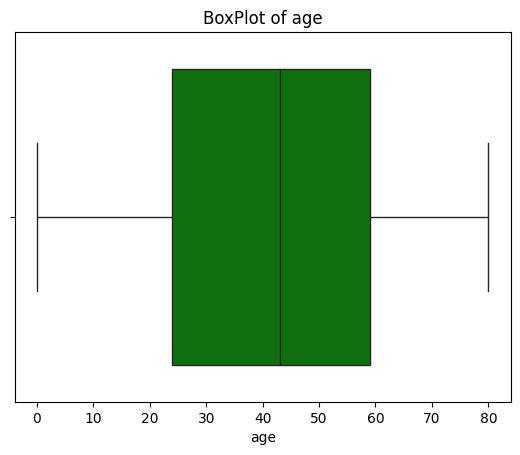

In [ ]:
sns.boxplot(x=data['age'], color='green')
plt.title("BoxPlot of age")
plt.show()

In [ ]:
data = pd.get_dummies(data,columns=["gender", "smoking_history"])
data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,True,False,True,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,True,False,True,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,False,True,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,True,False,False,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report




In [ ]:
X = data.drop(columns=["diabetes"]);
y = data["diabetes"]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE   #optmize recall
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17453
           1       0.74      0.75      0.75      1773

    accuracy                           0.95     19226
   macro avg       0.86      0.86      0.86     19226
weighted avg       0.95      0.95      0.95     19226



In [ ]:
cuf_matrix = metrics.confusion_matrix(y_pred,y_test)
cuf_matrix

array([[16995,   445],
       [  458,  1328]])

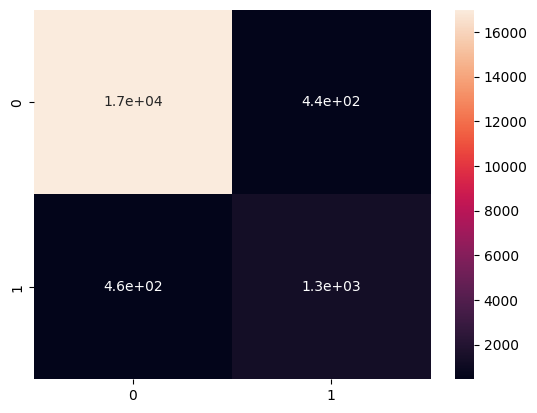

In [ ]:
import seaborn as sns
sns.heatmap(cuf_matrix,annot=True)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17453
           1       0.74      0.75      0.75      1773

    accuracy                           0.95     19226
   macro avg       0.86      0.86      0.86     19226
weighted avg       0.95      0.95      0.95     19226



In [ ]:
accuracy = metrics.accuracy_score(y_pred,y_test)
print("Accuracy =" , accuracy)

Accuracy = 0.9530323520233018


In [ ]:
precision = metrics.precision_score(y_test,y_pred)
print("Precision= ",precision)

Precision=  0.7435610302351624


In [ ]:
recall = metrics.recall_score(y_test,y_pred)
print("Recall= ", recall)

Recall=  0.7490129723632262


In [ ]:
TP = cuf_matrix[0,0]
TN = cuf_matrix[1,1]
FP = cuf_matrix[0,1]
FN = cuf_matrix[1,0]

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error :', classification_error )

Classification error : 0.046967647976698224


In [ ]:
print("Confusion Matrix:")
print("                   Predicted Positive   Predicted Negative")
print(f"Actual Positive        {cuf_matrix[0, 0]}                   {cuf_matrix[0, 1]}")
print(f"Actual Negative        {cuf_matrix[1, 0]}                   {cuf_matrix[1, 1]}")

Confusion Matrix:
                   Predicted Positive   Predicted Negative
Actual Positive        16995                   445
Actual Negative        458                   1328


In [ ]:
gbm = GradientBoostingClassifier(
    n_estimators=60,
    learning_rate=0.15,
    max_depth=4,
    min_samples_split=2,
    random_state=42)
gbm.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.15, max_depth=4, n_estimators=60,
                           random_state=42)

In [ ]:
y_pred = gbm.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17453
           1       0.74      0.75      0.75      1773

    accuracy                           0.95     19226
   macro avg       0.86      0.86      0.86     19226
weighted avg       0.95      0.95      0.95     19226



In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9569333194632269
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17453
           1       0.92      0.58      0.71      1773

    accuracy                           0.96     19226
   macro avg       0.94      0.79      0.85     19226
weighted avg       0.96      0.96      0.95     19226



In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9583376677415999
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     17453
           1       0.97      0.57      0.72      1773

    accuracy                           0.96     19226
   macro avg       0.96      0.78      0.85     19226
weighted avg       0.96      0.96      0.95     19226



In [ ]:

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9066888588369916
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     17453
           1       0.50      0.80      0.61      1773

    accuracy                           0.91     19226
   macro avg       0.74      0.86      0.78     19226
weighted avg       0.93      0.91      0.92     19226

